## Organic adoption

Our most conservative estimate assumes organic adoption, up to a theoretical maximum where we've integrated with every existing on-wiki workflow.  We use a logistic curve to show exponential adoption and eventual saturation.

The graph below shows organic integration with new pages patrol, recent changes patrol, PageTriage, and FlaggedRevs.  Note that the wikis I'm using as a baseline here, enwiki and wikidata, don't use all of these workflows together.

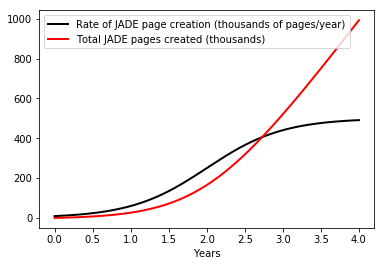

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

def sigmoid(x, a, b, L):
    # sigmoid function with parameters a = center; b = width; L = maximum value
    return L / (1 + np.exp(-(x - a) / b))

# Projected adoption
x = np.linspace(0, 4, 256)
y = sigmoid(x, 2, 0.5, 500)

# Integral of adoption
I = x.copy()
for index in range(x.size):
    I[index] = integrate.trapz(y[:index], x[:index], dx=0.01)

plt.plot(x, y, lw=2, color='black', label='Rate of JADE page creation (thousands of pages/year)')
plt.plot(x, I, lw=2, color='red', label='Total JADE pages created (thousands)')
plt.legend()
plt.xlabel('Years')
plt.show()

Here's the same data in the context of the overall activity on enwiki, for example:

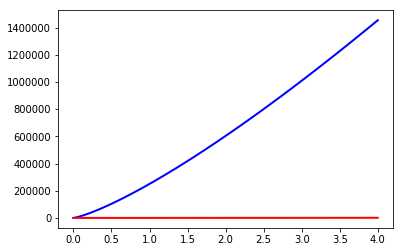

In [45]:
def growth(x, y0, r):
    return y0 * np.power(x, (1 + r))

s = growth(x, 250000, 0.27)
plt.plot(x, s, lw=2, color='blue', label='Total pages created (thousands)')
plt.plot(x, I, lw=2, color='red', label='Total pages created through JADE (thousands)')
plt.show()